In [1]:
%matplotlib inline
# import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

# Загрузка модели
model = YOLO('yolo11n-pose.pt')  # load an official model

points = 17
path_train = "DATASET/TRAIN/" # Путь к датасету
path_test = "DATASET/TEST/" # Путь к датасету

In [2]:
Key_Points_YOLO = ['Nose', 'LeftEye', 'RightEye', 'LeftEar', 'RightEar', 
                   'LeftShoulder', 'RightShoulder', 'LeftElbow', 'RightElbow', 
                   'LeftWrist', 'RightWrist', 'LeftHip', 'RightHip', 
                   'LeftKnee', 'RightKnee', 'LeftAnkle', 'RightAnkle'
                  ]

In [3]:
 # Создание пустого датафрейма для последующего сохраниения ключевых точек
def init_data(Key_Points):
    data = []
    data.append("FileName")
    i = 0
    for p in range(points):
        x = Key_Points[i]
        data.append(x + "_x")
        data.append(x + "_y")
        #data.append(x + "_vis")
        i += 1
    data.append("target")
    data = pd.DataFrame(columns = data) 
    return data

In [4]:
# Создание датасета каркасных моделей (набора ключевых точек и метки - названия позы)
def create_df_pos(path, name_file):
    data = init_data(Key_Points_YOLO)
    count = 0
    target = []
    for dr in os.listdir(path): # Перебор папок с видами поз
        for image in os.listdir(path + "/" +dr): # Перебор файлов в каждой папке
            temp = []
            img = cv2.imread(path + "/" + dr + "/" + image)
            # Копирование и конвертация изображения в RGB
            imageWidth, imageHeight = img.shape[:2]
            imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Преобразование BGR модели OpenCV в RGB модель, с которой работает YOLO
            # Обнаружение позы            
            results = model(imgRGB)  # predict on an image # Построение скелетной модели
            # Извлечение результатов
            for result in results[0]:
                xy = result.keypoints.xy  # x and y coordinates
                xyn = result.keypoints.xyn  # normalized
                kpts = result.keypoints.data  # x, y, visibility (if available)
            keypoints = np.array(xy[0])
            normal_keypoints = np.array(xyn[0])
            temp = temp + [path + dr + "/" + image]
            for i in range(len(normal_keypoints)):
                temp = temp + [normal_keypoints[i][0], normal_keypoints[i][1]] # Добавление ключевых точек
            temp = temp + [dr] # Добавление метки
            data.loc[count] = temp # Запись в дата фрейм
            count +=1
    data.to_csv(name_file) # Запись датафрейма ключевых точек в файл
    return data

In [5]:
# Построение диаграммы распределения скелетных моделей по классам
def paint_bar(data, s):
    df = data['target'].value_counts()
    label = list(df.index)
    counts = list(df.values)
    # Построение диаграммы распределения
    plt.bar(label, counts)
    plt.title('Распределение классов поз в ' + s + ' наборе')

In [6]:
# Построение датафрейма скелетных моделей обучающего набора
data_tr = create_df_pos(path_train, 'dataset_train_yolo.csv')
data_tr.head()


0: 640x640 1 person, 109.2ms
Speed: 10.9ms preprocess, 109.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 1 person, 77.0ms
Speed: 1.8ms preprocess, 77.0ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 640x640 1 person, 91.4ms
Speed: 2.1ms preprocess, 91.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 93.3ms
Speed: 3.7ms preprocess, 93.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 77.8ms
Speed: 1.6ms preprocess, 77.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 640x448 1 person, 66.0ms
Speed: 1.6ms preprocess, 66.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 person, 52.7ms
Speed: 1.9ms preprocess, 52.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)

0: 416x640 1 person, 63.5ms
Speed: 1.4ms preprocess, 63.5ms inference, 0.8ms postprocess per image at shape (1, 3,

Corrupt JPEG data: premature end of data segment


0: 448x640 3 persons, 59.7ms
Speed: 1.9ms preprocess, 59.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

0: 640x640 2 persons, 81.6ms
Speed: 1.8ms preprocess, 81.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 82.8ms
Speed: 2.6ms preprocess, 82.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 1 person, 64.0ms
Speed: 1.6ms preprocess, 64.0ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 608x640 1 person, 102.9ms
Speed: 2.2ms preprocess, 102.9ms inference, 0.9ms postprocess per image at shape (1, 3, 608, 640)

0: 384x640 1 person, 53.8ms
Speed: 1.4ms preprocess, 53.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 56.4ms
Speed: 2.2ms preprocess, 56.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 person, 60.9ms
Speed: 3.1ms preprocess, 60.9ms inference, 0.8ms postprocess per image at shape (1, 3

Premature end of JPEG file


0: 640x416 1 person, 69.6ms
Speed: 2.5ms preprocess, 69.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 416)

0: 640x544 1 person, 102.1ms
Speed: 3.5ms preprocess, 102.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 544)

0: 640x640 1 person, 76.1ms
Speed: 2.4ms preprocess, 76.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 77.0ms
Speed: 2.4ms preprocess, 77.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x512 1 person, 80.3ms
Speed: 2.3ms preprocess, 80.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)

0: 384x640 1 person, 54.2ms
Speed: 1.7ms preprocess, 54.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 640x640 1 person, 84.8ms
Speed: 3.2ms preprocess, 84.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x448 1 person, 57.1ms
Speed: 1.7ms preprocess, 57.1ms inference, 0.9ms postprocess per image at shape (1, 3, 

,FileName,Nose_x,Nose_y,LeftEye_x,LeftEye_y,RightEye_x,RightEye_y,LeftEar_x,LeftEar_y,RightEar_x,...,RightHip_y,LeftKnee_x,LeftKnee_y,RightKnee_x,RightKnee_y,LeftAnkle_x,LeftAnkle_y,RightAnkle_x,RightAnkle_y,target
0,DATASET/TRAIN/goddess/00000112.jpg,0.491947,0.211419,0.515570,0.195769,0.469061,0.194204,0.546930,0.233705,0.435640,...,0.564303,0.677927,0.638091,0.340114,0.635293,0.728458,0.842823,0.253672,0.850207,goddess
1,DATASET/TRAIN/goddess/00000190.jpg,0.524596,0.559279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.265839,0.629311,0.520242,0.334115,0.514050,0.695946,0.793068,0.333367,0.817234,goddess
2,DATASET/TRAIN/goddess/00000348.jpg,0.507754,0.223582,0.525367,0.204227,0.487004,0.201666,0.546034,0.216121,0.453233,...,0.601833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,goddess
3,DATASET/TRAIN/goddess/00000115.jpg,0.462815,0.316510,0.476968,0.300687,0.446125,0.301465,0.497440,0.318144,0.419488,...,0.607325,0.654707,0.652513,0.282018,0.646894,0.768021,0.851885,0.183234,0.848335,goddess
4,DATASET/TRAIN/goddess/00000358.jpg,0.504790,0.370821,0.514652,0.357501,0.494387,0.358465,0.531183,0.369628,0.479844,...,0.619716,0.613196,0.705484,0.425614,0.706517,0.640141,0.852668,0.377674,0.862327,goddess


<class 'pandas.core.frame.DataFrame'>
Index: 1081 entries, 0 to 1080
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FileName         1081 non-null   object 
 1   Nose_x           1081 non-null   float32
 2   Nose_y           1081 non-null   float32
 3   LeftEye_x        1081 non-null   float32
 4   LeftEye_y        1081 non-null   float32
 5   RightEye_x       1081 non-null   float32
 6   RightEye_y       1081 non-null   float32
 7   LeftEar_x        1081 non-null   float32
 8   LeftEar_y        1081 non-null   float32
 9   RightEar_x       1081 non-null   float32
 10  RightEar_y       1081 non-null   float32
 11  LeftShoulder_x   1081 non-null   float32
 12  LeftShoulder_y   1081 non-null   float32
 13  RightShoulder_x  1081 non-null   float32
 14  RightShoulder_y  1081 non-null   float32
 15  LeftElbow_x      1081 non-null   float32
 16  LeftElbow_y      1081 non-null   float32
 17  RightElbow_x     10

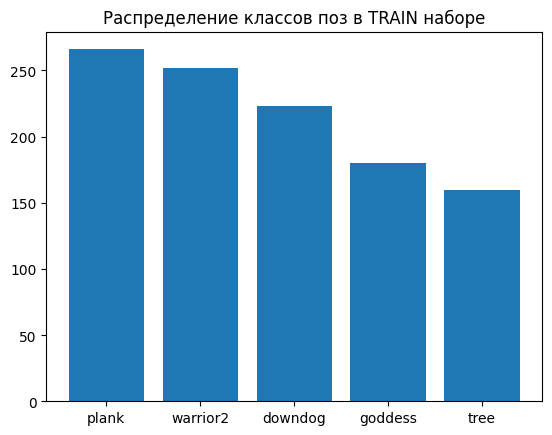

In [7]:
# Вывод характеристик датафрейма скелетных моделей обучающего набора
print(data_tr.info())
print(data_tr['target'].value_counts())
paint_bar(data_tr, 'TRAIN')
# Отображение гистограммы
plt.show()

In [8]:
# Построение датафрейма скелетных моделей тестового набора
data_te = create_df_pos(path_test, 'dataset_test_yolo.csv')
data_te.head()


0: 320x640 1 person, 70.1ms
Speed: 1.8ms preprocess, 70.1ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)

0: 640x640 1 person, 77.8ms
Speed: 3.0ms preprocess, 77.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 74.2ms
Speed: 2.6ms preprocess, 74.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 77.3ms
Speed: 1.8ms preprocess, 77.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 576x640 1 person, 93.3ms
Speed: 2.6ms preprocess, 93.3ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 640)

0: 288x640 1 person, 63.4ms
Speed: 1.1ms preprocess, 63.4ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 640)

0: 640x640 1 person, 70.9ms
Speed: 2.4ms preprocess, 70.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 71.3ms
Speed: 2.4ms preprocess, 71.3ms inference, 0.9ms postprocess per image at shape (1, 3, 64

libpng warning: iCCP: known incorrect sRGB profile


0: 512x640 1 person, 78.3ms
Speed: 3.1ms preprocess, 78.3ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)

0: 640x640 1 person, 72.8ms
Speed: 2.7ms preprocess, 72.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x608 1 person, 89.6ms
Speed: 2.4ms preprocess, 89.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 608)

0: 448x640 1 person, 50.6ms
Speed: 2.0ms preprocess, 50.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)

0: 640x544 1 person, 80.7ms
Speed: 2.0ms preprocess, 80.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 544)

0: 640x640 1 person, 71.9ms
Speed: 1.8ms preprocess, 71.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 512x640 1 person, 60.0ms
Speed: 2.9ms preprocess, 60.0ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)

0: 640x448 1 person, 70.9ms
Speed: 1.5ms preprocess, 70.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640

libpng warning: iCCP: known incorrect sRGB profile



0: 480x640 1 person, 82.5ms
Speed: 2.4ms preprocess, 82.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 640x480 1 person, 100.6ms
Speed: 1.9ms preprocess, 100.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)

0: 640x544 1 person, 91.7ms
Speed: 6.7ms preprocess, 91.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 544)

0: 448x640 1 person, 61.5ms
Speed: 2.1ms preprocess, 61.5ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 640x640 1 person, 78.0ms
Speed: 3.0ms preprocess, 78.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 69.9ms
Speed: 3.3ms preprocess, 69.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 person, 68.4ms
Speed: 1.6ms preprocess, 68.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 640x512 1 person, 78.3ms
Speed: 2.1ms preprocess, 78.3ms inference, 0.8ms postprocess per image at shape (1, 3, 

libpng warning: iCCP: known incorrect sRGB profile



0: 480x640 1 person, 62.3ms
Speed: 2.5ms preprocess, 62.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 640x416 1 person, 74.6ms
Speed: 2.0ms preprocess, 74.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 416)

0: 448x640 1 person, 56.3ms
Speed: 1.8ms preprocess, 56.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 640x448 1 person, 54.6ms
Speed: 2.8ms preprocess, 54.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)

0: 640x640 1 person, 77.6ms
Speed: 3.1ms preprocess, 77.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x448 1 person, 58.2ms
Speed: 2.1ms preprocess, 58.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 person, 60.5ms
Speed: 2.2ms preprocess, 60.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)

0: 384x640 1 person, 53.4ms
Speed: 1.9ms preprocess, 53.4ms inference, 0.8ms postprocess per image at shape (1, 3, 38

,FileName,Nose_x,Nose_y,LeftEye_x,LeftEye_y,RightEye_x,RightEye_y,LeftEar_x,LeftEar_y,RightEar_x,...,RightHip_y,LeftKnee_x,LeftKnee_y,RightKnee_x,RightKnee_y,LeftAnkle_x,LeftAnkle_y,RightAnkle_x,RightAnkle_y,target
0,DATASET/TEST/goddess/00000016.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.535533,...,0.573477,0.446826,0.706344,0.596725,0.696471,0.400560,0.883506,0.640406,0.871435,goddess
1,DATASET/TEST/goddess/00000057.jpg,0.431670,0.138006,0.452579,0.124731,0.419271,0.119543,0.484239,0.165733,0.407478,...,0.543465,0.683052,0.682766,0.233415,0.686536,0.808507,0.885391,0.104518,0.890778,goddess
2,DATASET/TEST/goddess/00000036.jpg,0.536768,0.307838,0.549869,0.295760,0.523767,0.294058,0.568948,0.316025,0.499265,...,0.604794,0.717556,0.658037,0.400574,0.657151,0.762392,0.823137,0.317643,0.822458,goddess
3,DATASET/TEST/goddess/00000088.jpg,0.512552,0.163234,0.526491,0.144650,0.499309,0.145219,0.546385,0.172100,0.475668,...,0.557884,0.690662,0.640666,0.337315,0.647872,0.778556,0.892299,0.268049,0.899496,goddess
4,DATASET/TEST/goddess/00000050.jpg,0.463178,0.188373,0.484125,0.168676,0.446147,0.168650,0.511632,0.193802,0.418623,...,0.583471,0.669854,0.680089,0.312127,0.686353,0.709369,0.881856,0.241850,0.882729,goddess


<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 469
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FileName         470 non-null    object 
 1   Nose_x           470 non-null    float32
 2   Nose_y           470 non-null    float32
 3   LeftEye_x        470 non-null    float32
 4   LeftEye_y        470 non-null    float32
 5   RightEye_x       470 non-null    float32
 6   RightEye_y       470 non-null    float32
 7   LeftEar_x        470 non-null    float32
 8   LeftEar_y        470 non-null    float32
 9   RightEar_x       470 non-null    float32
 10  RightEar_y       470 non-null    float32
 11  LeftShoulder_x   470 non-null    float32
 12  LeftShoulder_y   470 non-null    float32
 13  RightShoulder_x  470 non-null    float32
 14  RightShoulder_y  470 non-null    float32
 15  LeftElbow_x      470 non-null    float32
 16  LeftElbow_y      470 non-null    float32
 17  RightElbow_x     470 

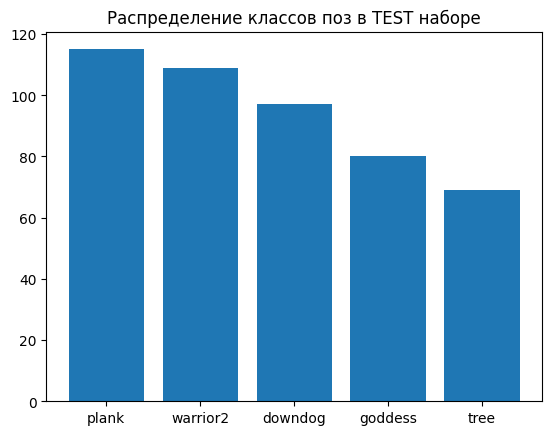

In [9]:
# Вывод характеристик датафрейма скелетных моделей тестового набора
print(data_te.info())
print(data_te['target'].value_counts())
paint_bar(data_te, 'TEST')
# Отображение гистограммы
plt.show()

In [10]:
# Создание наборов данных
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os

# Загрузка и создание обучающего набора
data_train = pd.read_csv("dataset_train_yolo.csv")

X_train = data_train.iloc[:, 2:36]
Y_train = data_train['target']

# Загрузка и создание обучающего набора
data_test = pd.read_csv("dataset_test_yolo.csv")
X_test = data_test.iloc[:, 2:36]
Y_test = data_test['target']



kernel = poly
              precision    recall  f1-score   support

     goddess       0.92      0.95      0.93        97
     downdog       0.86      0.82      0.84        80
       plank       0.97      0.90      0.94       115
    warrior2       0.94      0.99      0.96        69
        tree       0.87      0.91      0.89       109

    accuracy                           0.91       470
   macro avg       0.91      0.91      0.91       470
weighted avg       0.91      0.91      0.91       470



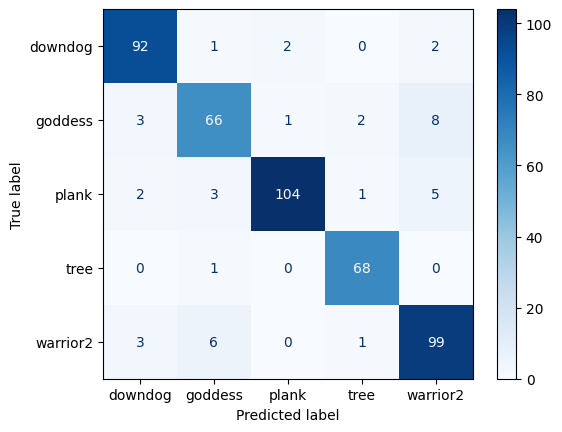


kernel = rbf
              precision    recall  f1-score   support

     goddess       0.92      0.93      0.92        97
     downdog       0.91      0.75      0.82        80
       plank       0.93      0.91      0.92       115
    warrior2       0.91      0.91      0.91        69
        tree       0.81      0.92      0.86       109

    accuracy                           0.89       470
   macro avg       0.90      0.88      0.89       470
weighted avg       0.89      0.89      0.89       470



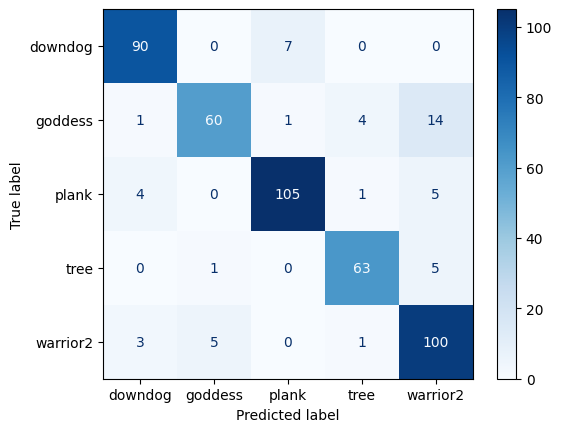


kernel = sigmoid
              precision    recall  f1-score   support

     goddess       0.13      0.45      0.20        97
     downdog       0.00      0.00      0.00        80
       plank       0.28      0.04      0.08       115
    warrior2       0.00      0.00      0.00        69
        tree       0.19      0.14      0.16       109

    accuracy                           0.14       470
   macro avg       0.12      0.13      0.09       470
weighted avg       0.14      0.14      0.10       470



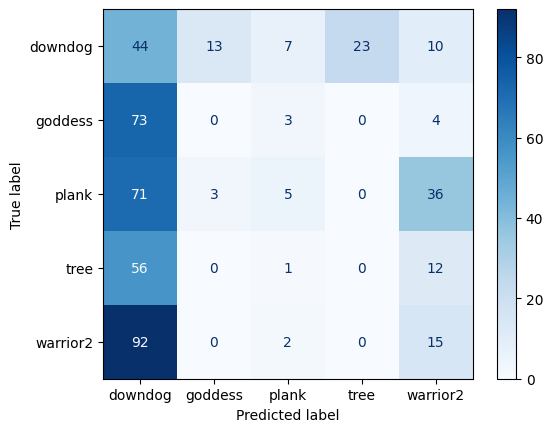

In [11]:
# Исследование классификатора на основе метода опорных векторов
from sklearn.metrics import classification_report
# Создание массива меток (классов поз)
label = []
for i in Y_test:
    if not(i in label):
        label.append(i)

# Классификатор с полиномиальным ядром
print('\nkernel = poly')
modelSVC = SVC(kernel = 'poly')
modelSVC.fit(X_train,Y_train)
# Оценка качества построенного классификатора на тестовом наборе
report = classification_report(Y_test, modelSVC.predict(X_test), target_names=label) 
print(report)
predictions = modelSVC.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=modelSVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelSVC.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Классификатор с радиальным ядром
print('\nkernel = rbf')
modelSVC = SVC(kernel = 'rbf')
modelSVC.fit(X_train,Y_train)
# Оценка качества построенного классификатора на тестовом наборе
report = classification_report(Y_test, modelSVC.predict(X_test), target_names=label)
print(report)
predictions = modelSVC.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=modelSVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelSVC.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Классификатор с сигмоидальным ядром
print('\nkernel = sigmoid')
modelSVC = SVC(kernel = 'sigmoid')
modelSVC.fit(X_train,Y_train)
# Оценка качества построенного классификатора на тестовом наборе
report = classification_report(Y_test, modelSVC.predict(X_test), target_names=label)
print(report)
predictions = modelSVC.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=modelSVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelSVC.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [12]:
# Обучение модели
modelSVC = SVC(kernel = 'poly') #'poly', 'rbf', 'sigmoid'
modelSVC.fit(X_train,Y_train)

# Проверка работы классификатора

# Загрузка выбранного файла
path = 'DATASET/TEST/plank/00000115.jpg'             #'DATASET/Test/warrior2/00000093.jpg' 'DATASET/Train/goddess/00000137.jpg' 'DATASET/TEST/plank/00000115.jpg'
temp = []
img = cv2.imread(path)
# Копирование и конвертация изображения в RGB
# imageWidth, imageHeight = img.shape[:2]
# imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Преобразование BGR модели OpenCV в RGB модель, с которой работает YOLO
# Обнаружение позы
imgRGB = img            
results = model(imgRGB)  # predict on an image 

# Построение скелетной модели
# Извлечение результатов
for result in results[0]:
    xy = result.keypoints.xy  # x and y coordinates
    xyn = result.keypoints.xyn  # normalized
    kpts = result.keypoints.data  # x, y, visibility (if available)
keypoints = np.array(xy[0])
normal_keypoints = np.array(xyn[0])
for i in range(len(normal_keypoints)):
    temp = temp + [normal_keypoints[i][0], normal_keypoints[i][1]] # Добавление ключевых точек
 
# Предсказание построенным классификатором класса позы по построенной скелетной модели    
res = modelSVC.predict([temp])
label_predict = res[0]

# Вывод результата
print('Эталонное название позы - ', path.split('/')[2]) 
print('Предсказанное название позы - ', label_predict) 

# Визуализация результата
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot(conf = False, kpt_radius = 7, boxes = False, masks = False)  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image
    
    # Show results to screen (in supported environments)
    r.show()
    # Save results to disk
    r.save(filename=f"results{i}.jpg")




0: 384x640 1 person, 51.6ms
Speed: 1.5ms preprocess, 51.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Эталонное название позы -  plank
Предсказанное название позы -  plank


qt5ct: using qt5ct plugin
qt5ct: palette support is disabled
qt5ct: custom style sheet is disabled
libpng warning: iCCP: known incorrect sRGB profile
QCssParser::parseColorValue: Specified color without alpha value but alpha given: 'rgb 0, 0, 0, 127'
QCssParser::parseColorValue: Specified color without alpha value but alpha given: 'rgb 255, 255, 255, 255'
QCssParser::parseColorValue: Specified color without alpha value but alpha given: 'rgb 0, 0, 0, 127'
QCssParser::parseColorValue: Specified color without alpha value but alpha given: 'rgb 255, 255, 255, 255'
QCssParser::parseColorValue: Specified color without alpha value but alpha given: 'rgb 0, 0, 0, 127'
QCssParser::parseColorValue: Specified color without alpha value but alpha given: 'rgb 255, 255, 255, 255'
QCssParser::parseColorValue: Specified color without alpha value but alpha given: 'rgb 0, 0, 0, 127'
QCssParser::parseColorValue: Specified color without alpha value but alpha given: 'rgb 255, 255, 255, 255'
QCssParser::parseC

0.32.0 (git 0e9a8e6) - Multimedia Development Kit. Copyright (c) 2016-2025 WangBin(QtAV author) <wbsecg1 at gmail.com>
Build for: Linux 4KB x86_64; glibc2.24/2.41 libc++210000; Clang21.0.0 (++20250321082721+03557169e0ad-1~exp1~20250321082842.799); 10:27:00 Mar 22 2025
==> 1,000000  1,000000  143,907121  96,000000  (0)
XNVIEW restoreGeometry before : 640 480 
XNVIEW restoreGeometry after : 960 963 
ARG[] = /opt/xnviewmp/XnView
ARG[] = /tmp/tmpthnnd54q.PNG
MENU install : 0x2e8298d0 
@@@@@@@@@@
Create window finished
==> 960 
ThumbLoaderThread :: stop()
@@ BitmapResizeThread:: clear
MyView::change /tmp/tmpthnnd54q.PNG 
@@ BitmapResizeThread:: clear
## Bitmap :: load 0 
###### GFF:load </tmp/tmpthnnd54q.PNG>
####LOAD </tmp/tmpthnnd54q.PNG>  0 
@@ BitmapResizeThread:: clear
### resetViewport (0x2e7be0e0)  ==> 960 839  (768 432) 0 0
ThumbLoaderThread :: stop()
ThumbLoaderThread :: stop()
SORT the list...
STD::SORT... 0
  STL::SORT... 0
SORT the list... 3 
SORT the list... 3 
ThumbLoaderThrea